<a href="https://colab.research.google.com/github/Shrey-Viradiya/HandsOnMachineLearning/blob/master/Artificial_Neural_Networks_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks with Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

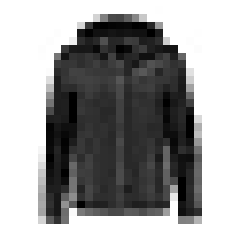

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train[0]

4

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

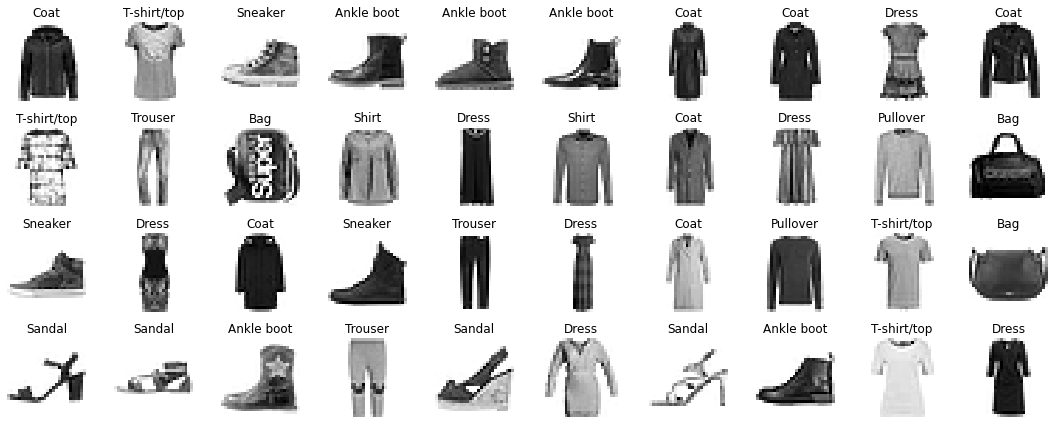

In [14]:
n_rows = 4
n_cols = 10

plt.figure(figsize = (n_cols * 1.5, n_rows * 1.5))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.tight_layout()
plt.show()

## CREATING THE MODEL USING THE SEQUENTIAL API

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [16]:
keras.backend.clear_session()
np.random.seed(259)
tf.random.set_seed(259)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]

In [21]:
hidden1.name

'dense'

In [22]:
model.get_layer('dense') is hidden1

True

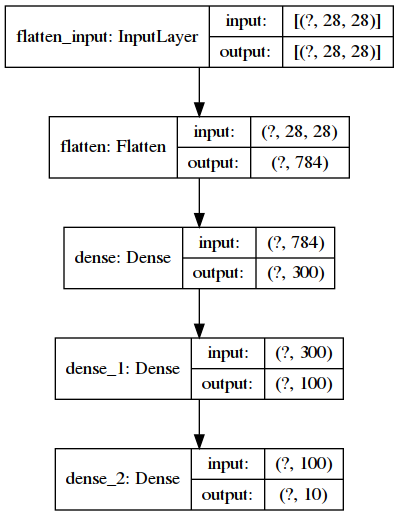

In [23]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[-0.00315184,  0.04630247, -0.00316229, ...,  0.01646411,
        -0.02042289, -0.03946767],
       [ 0.05136564, -0.02859101,  0.04602057, ...,  0.00757318,
        -0.06618038, -0.05471007],
       [ 0.04691272, -0.0026296 ,  0.07020119, ..., -0.04660381,
        -0.03666015,  0.02501245],
       ...,
       [ 0.012565  ,  0.05742019, -0.06992737, ...,  0.04477017,
         0.03706373,  0.05789621],
       [-0.06575304,  0.07304707,  0.05090609, ...,  0.03085814,
        -0.00268235, -0.05790088],
       [ 0.02920057, -0.00429318,  0.01269243, ...,  0.01845723,
        -0.05683304,  0.01923399]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

In [29]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### TRAINING AND EVALUATING THE MODEL

In [30]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7215 - accuracy: 0.7638 - val_loss: 0.5147 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4902 - accuracy: 0.8298 - val_loss: 0.5012 - val_accuracy: 0.8212
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4453 - accuracy: 0.8435 - val_loss: 0.4200 - val_accuracy: 0.8534
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4176 - accuracy: 0.8530 - val_loss: 0.4021 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3979 - accuracy: 0.8593 - val_loss: 0.3949 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.8661 - val_loss: 0.3786 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3679 - accuracy: 0.8699 - val_loss: 0.3813 - val_accuracy:

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

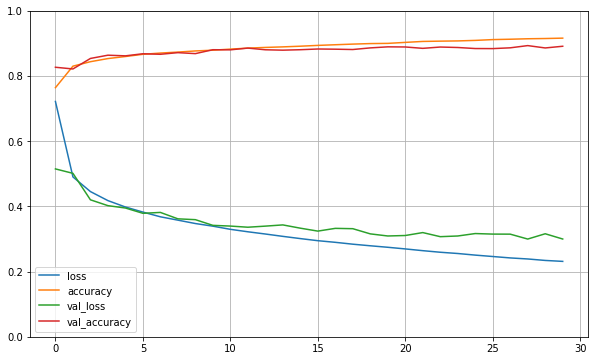

In [32]:
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.ylim(0,1)
plt.show()

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3342 - accuracy: 0.8798


[0.33416253328323364, 0.879800021648407]

### USING THE MODEL TO MAKE PREDICTIONS

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.07, 0.  , 0.92],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1) # Equivalent to code above as it is deprocated

In [36]:
y_pred

array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

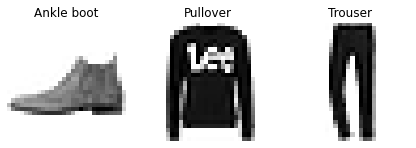

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP Using the Sequential API

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [41]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [43]:
X_train.shape

(11610, 8)

In [44]:
X_train.shape[1:]

(8,)

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

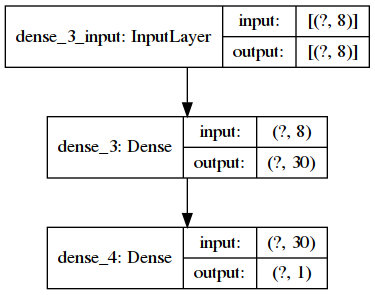

In [46]:
keras.utils.plot_model(model, 'california_housing_regression.png', show_shapes=True)

In [47]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1019 - val_loss: 0.9200
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8252 - val_loss: 0.7068
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6903 - val_loss: 0.6480
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6425 - val_loss: 0.6086
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6068 - val_loss: 0.5776
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5797 - val_loss: 0.5530
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5583 - val_loss: 0.5345
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5415 - val_loss: 0.5199
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5281 - val_loss: 0.5093
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5176 - val_loss: 0.4999

In [48]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 2ms/step - loss: 0.4667


In [49]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

In [50]:
y_pred

array([[1.0032455],
       [1.379019 ],
       [2.3937654]], dtype=float32)

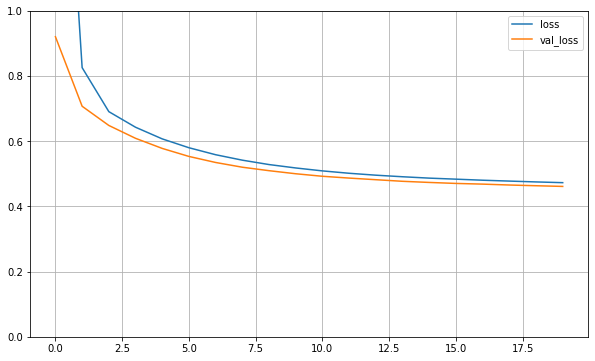

In [51]:
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.ylim(0,1)
plt.show()

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs

In [52]:
np.random.seed(259)
tf.random.set_seed(259)

In [53]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs = [input_], outputs = [output])

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [55]:
model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.SGD(lr = 1e-3))
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.0043 - val_loss: 0.7419
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7490 - val_loss: 0.6072
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6397 - val_loss: 0.5725
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5981 - val_loss: 0.5460
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5647 - val_loss: 0.5311
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5486 - val_loss: 0.5208
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5386 - val_loss: 0.5104
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5271 - val_loss: 0.5028
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5182 - val_loss: 0.4970
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5110 - val_loss: 0.4897

In [56]:
mse_test

0.43657055497169495

In [57]:
y_pred

array([[0.9787465],
       [1.2013588],
       [2.3135905]], dtype=float32)

In [58]:
y_test[:3]

array([0.888, 1.064, 2.098])

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [59]:
inputA = keras.layers.Input(shape = [5], name='wide_input')
inputB = keras.layers.Input(shape = [6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(inputB)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([inputA, hidden2])
output = keras.layers.Dense(1, name = 'Output')(concat)

model = keras.models.Model(inputs = [inputA, inputB], outputs = [output])

In [60]:
model.compile(loss = 'mse', optimizer=keras.optimizers.SGD(lr = 1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:,2:]
X_new_A, X_new_B = X_new[:, :5], X_new[:,2:]

In [61]:
history = model.fit((X_train_A, X_train_B), y_train, epochs = 20, validation_data = ((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9979 - val_loss: 0.9279
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8090 - val_loss: 0.6992
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6807 - val_loss: 0.6305
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6327 - val_loss: 0.5963
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6039 - val_loss: 0.5736
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5831 - val_loss: 0.5557
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5666 - val_loss: 0.5422
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5532 - val_loss: 0.5310
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5421 - val_loss: 0.5230
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5335 - val_loss: 0.5144

In [62]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 996us/step - loss: 0.4847


In [63]:
y_pred

array([[0.892526 ],
       [1.2798748],
       [2.5379155]], dtype=float32)

In [64]:
y_test[:3]

array([0.888, 1.064, 2.098])


Adding an auxiliary output for regularization:

In [65]:
np.random.seed(259)
tf.random.set_seed(259)

In [66]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [68]:
model.compile(loss = ['mse','mse'], loss_weights = [0.9, 0.1], optimizer = keras.optimizers.SGD(lr = 1e-3))

In [69]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 30, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.7548 - main_output_loss: 2.5201 - aux_output_loss: 4.8672 - val_loss: 1.4389 - val_main_output_loss: 1.1401 - val_aux_output_loss: 4.1287
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 1.2315 - main_output_loss: 0.9874 - aux_output_loss: 3.4287 - val_loss: 0.9747 - val_main_output_loss: 0.7658 - val_aux_output_loss: 2.8543
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9175 - main_output_loss: 0.7458 - aux_output_loss: 2.4626 - val_loss: 0.8354 - val_main_output_loss: 0.6906 - val_aux_output_loss: 2.1386
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8183 - main_output_loss: 0.6944 - aux_output_loss: 1.9327 - val_loss: 0.7677 - val_main_output_loss: 0.6575 - val_aux_output_loss: 1.7590
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7637 - main_output_loss: 0.6642 - aux_output_loss: 1.6588 - val_loss

In [70]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.5359 - main_output_loss: 0.4907 - aux_output_loss: 0.9422


In [71]:
total_loss, main_loss, aux_loss

(0.5358562469482422, 0.4907100200653076, 0.9421709179878235)

In [72]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [73]:
y_pred_main, y_pred_aux

(array([[0.94189966],
        [1.3402185 ],
        [2.5042229 ]], dtype=float32),
 array([[1.4926926],
        [1.9279397],
        [2.5046644]], dtype=float32))

In [74]:
y_test[:3]

array([0.888, 1.064, 2.098])